<a href="https://colab.research.google.com/github/MK316/Spring2023/blob/main/RandomPickerS23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 😍 The final pick
---

In [4]:
url = "https://github.com/MK316/Spring2023/raw/main/Engpro/engpro_att.csv"

In [3]:
#@markdown Font install (for Korean): 'NanumGothic'
!apt-get update -qq
!apt-get install -qq fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=36)
plt.rc('font', family='NanumGothic')


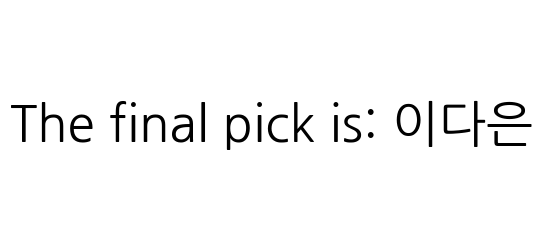

In [6]:
#@markdown Who's the final pick?
# Step 1: Import necessary libraries

import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output


# Step 2: Read the CSV file and extract the "Names" column as a list
try:
    df = pd.read_csv(url, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding='cp949')

names = df["Names"].tolist()

# Step 3: Pick a random name from 'names' variable
def pick_random_name():
    selected_name = random.choice(names)
    return selected_name

# Step 4: Display the picked name in a larger font size
def display_name(name, font_size=36, final_pick=False):
    clear_output(wait=True)
    plt.figure(figsize=(6, 3))

    if final_pick:
        plt.text(0.5, 0.5, f"The final pick is: {name}", fontsize=font_size, ha='center', va='center', fontproperties=font)
    else:
        plt.text(0.5, 0.5, name, fontsize=font_size, ha='center', va='center', fontproperties=font)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.box(False)
    plt.show()
    time.sleep(1)

# Step 5: Pick random names and display them
for i in range(9):
    picked_name = pick_random_name()
    display_name(picked_name)

# Step 6: Display the 10th picked name
picked_name = pick_random_name()
display_name(picked_name, final_pick=True)


---
# 😍 Live link using Gradio
---

The app will ask the file link from github
The app will ask the class name: Engpro, DL, or Engling

In [1]:
%%capture
!pip install gradio
import gradio as gr

import pandas as pd
import random
import time
import gradio as gr

In [14]:
#@markdown Gradio live link to pick ONE:
# Step 1: Get the GitHub CSV link from the user
# github_csv_link = "https://raw.githubusercontent.com/MK316/Spring2023/main/data/S23_att_total.csv"

# def pick_random_name(names):
#     selected_name = random.choice(names)
#     return selected_name

url_input = gr.inputs.Textbox(lines=1, label="Enter the GitHub CSV file link:")
class_input = gr.inputs.Textbox(lines=1, label="Enter the class name:")
output = gr.outputs.Textbox(label="Picked Name:")

inputs = [url_input, class_input]
def run_app(url, class_name):
    # Step 1: Read the CSV file and extract the "Names" column based on the given class name
    try:
        df = pd.read_csv(url, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(url, encoding='cp949')

    names = df.loc[df["Class"] == class_name, "Names"].tolist()

    # Simulate the random picking process by concatenating the names
    intermediate_text = ""
    for i in range(9):
        intermediate_text += random.choice(names) + " -> "
        time.sleep(0.5)  # Pause for half a second to simulate the process

    picked_name = pick_random_name(names)
    sn = len(names)
    sn = int(sn)
    return intermediate_text + "\n\nFinal pick (out of %d): "%sn + picked_name

gr.Interface(fn=run_app, inputs=inputs, outputs=output, title="MK316 Class: Random Name Picker").launch(share=True)



/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4f2daf41d23690c233.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
